# GIF animé
Nous allons utiliser le sous-module [matplotlib.animation](https://matplotlib.org/stable/api/animation_api.html) pour créer des GIFs animés.



In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.animation import FuncAnimation, PillowWriter
from IPython.display import HTML

Voici les éléments dans `matplotlib.animation` commençant avec la lettre F.

In [6]:
[x for x in dir(animation) if x.startswith('F')]

['FFMpegBase',
 'FFMpegFileWriter',
 'FFMpegWriter',
 'FileMovieWriter',
 'FuncAnimation']

## Créer une animation

Voici une animation simple qui crée 32 trames.

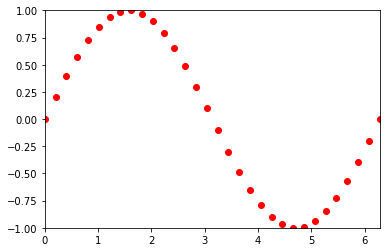

In [3]:
fig, ax = plt.subplots()
xdata, ydata = [], []
ln, = plt.plot([], [], 'ro')

def init():
    ax.set_xlim(0, 2*np.pi)
    ax.set_ylim(-1, 1)
    return ln,

def update(frame):
    xdata.append(frame)
    ydata.append(np.sin(frame))
    ln.set_data(xdata, ydata)
    return ln,

a = FuncAnimation(fig, update, frames=np.linspace(0, 2*np.pi, 32),
                    init_func=init, blit=True)
HTML(a.to_jshtml())

## Trames

0.0
0.2026833970057931
0.4053667940115862
0.6080501910173793
0.8107335880231724
1.0134169850289656
1.2161003820347587
1.4187837790405518
1.6214671760463448
1.824150573052138
2.026833970057931
2.2295173670637243
2.4322007640695174
2.6348841610753104
2.8375675580811035
3.0402509550868966
3.2429343520926897
3.4456177490984827
3.648301146104276
3.850984543110069
4.053667940115862
4.2563513371216555
4.4590347341274486
4.661718131133242
4.864401528139035
5.067084925144828
5.269768322150621
5.472451719156414
5.675135116162207
5.877818513168
6.080501910173793
6.283185307179586


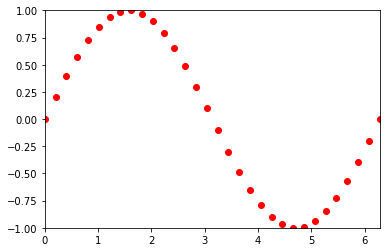

In [87]:
fig, ax = plt.subplots()
xdata, ydata = [], []
ln, = plt.plot([], [], 'ro')

def init():
    ax.set_xlim(0, 2*np.pi)
    ax.set_ylim(-1, 1)
    return ln,

def update(frame):
    xdata.append(frame)
    ydata.append(np.sin(frame))
    ln.set_data(xdata, ydata)
    print(frame)
    return ln,

a = FuncAnimation(fig, update, np.linspace(0, 2*np.pi, 32),
                    init_func=init, blit=True)
HTML(a.to_jshtml())

## Sauvegarder un GIF

Sauvegarder l'animation comme GIF animé est très simple.

In [52]:
pwd

'/Users/raphael/GitHub/edunum/doc/plot/gif'

In [71]:
a.save('sine.gif', PillowWriter())

In [73]:
lf *.gif

-rw-r--r--  1 raphael  staff  8046205 Feb  9 21:21 demo.gif
-rw-r--r--  1 raphael  staff   216100 Feb  9 21:29 demo2.gif
-rw-r--r--  1 raphael  staff   353890 Feb  9 21:11 demo_sine.gif
-rw-r--r--  1 raphael  staff  1745202 Feb  9 21:51 dynamic_images.gif
-rw-r--r--  1 raphael  staff    88797 Feb  9 21:53 line.gif
-rw-r--r--  1 raphael  staff  4456191 Feb  9 21:39 rain.gif
-rw-r--r--  1 raphael  staff  1745202 Feb 10 05:06 sin_cos.gif
-rw-r--r--  1 raphael  staff    40756 Feb 10 08:25 sine.gif


![](sine.gif)

In [72]:
a.save('sine.mp4') 

Il faut installer **ffmpeg**
    
    brew install ffmpeg

In [65]:
pwd

'/Users/raphael/GitHub/edunum/doc/plot/gif'

## GIF avec pygame
Used to create Pymunk animations.

In [ ]:
   def make_gif(self):
        if self.gif > 0:
            strFormat = 'RGBA'
            raw_str = pygame.image.tostring(self.screen, strFormat, False)
            image = Image.frombytes(
                strFormat, self.screen.get_size(), raw_str)
            self.images.append(image)
            self.gif -= 1
            if self.gif == 0:
                self.images[0].save('joint.gif',
                                    save_all=True, append_images=self.images[1:],
                                    optimize=True, duration=1000//fps, loop=0)
                self.images = []

## Matplotlib.animation

MovieWriter ffmpeg unavailable; using Pillow instead.


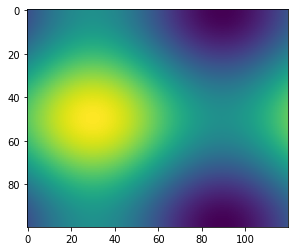

In [62]:
fig = plt.figure()

def f(x, y):
    return np.sin(x) + np.cos(y)

x = np.linspace(0, 2 * np.pi, 120)
y = np.linspace(0, 2 * np.pi, 100).reshape(-1, 1)
# ims is a list of lists, each row is a list of artists to draw in the
# current frame; here we are just animating one artist, the image, in
# each frame
ims = []
for i in range(60):
    x += np.pi / 15.
    y += np.pi / 20.
    im = plt.imshow(f(x, y), animated=True)
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)
ani.save('sin_cos.gif')
plt.show()

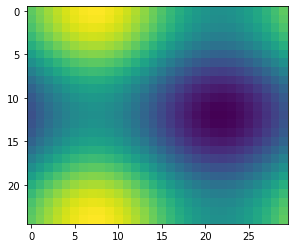

In [96]:
def f(x, y):
    return np.sin(x) + np.cos(y)

x = np.linspace(0, 2 * np.pi, 30)
y = np.linspace(0, 2 * np.pi, 25).reshape(-1, 1)

plt.imshow(f(x, y), animated=True)

![](sin_cos.gif)

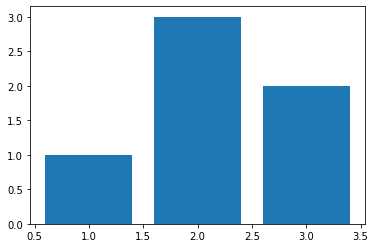

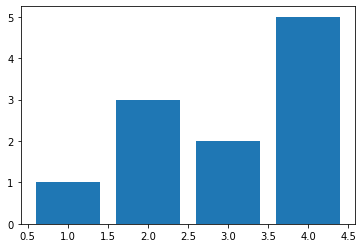

[<BarContainer object of 3 artists>, <BarContainer object of 4 artists>]


In [109]:

a = plt.bar([1, 2, 3], [1, 3, 2])
plt.show()
b = plt.bar([1, 2, 3, 4], [1, 3, 2, 5])
plt.show()
img = [a, b]

print(img)

fig size: 72.0 DPI, size in inches [6. 4.]
timestep 0
timestep 0
timestep 1
timestep 2
timestep 3
timestep 4
timestep 5
timestep 6
timestep 7
timestep 8
timestep 9


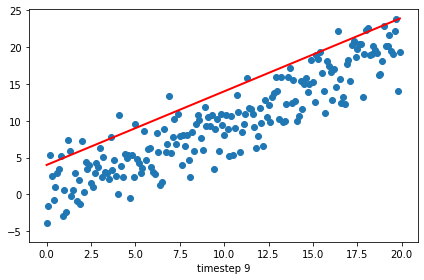

In [60]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots()
fig.set_tight_layout(True)

# Query the figure's on-screen size and DPI. Note that when saving the figure to
# a file, we need to provide a DPI for that separately.
print('fig size: {0} DPI, size in inches {1}'.format(
    fig.get_dpi(), fig.get_size_inches()))

# Plot a scatter that persists (isn't redrawn) and the initial line.
x = np.arange(0, 20, 0.1)
ax.scatter(x, x + np.random.normal(0, 3.0, len(x)))
line, = ax.plot(x, x - 5, 'r-', linewidth=2)

def update(i):
    label = 'timestep {0}'.format(i)
    print(label)
    # Update the line and the axes (with a new xlabel). Return a tuple of
    # "artists" that have to be redrawn for this frame.
    line.set_ydata(x - 5 + i)
    ax.set_xlabel(label)
    return line, ax

if __name__ == '__main__':
    # FuncAnimation will call the 'update' function for each frame; here
    # animating over 10 frames, with an interval of 200ms between frames.
    anim = FuncAnimation(fig, update, frames=np.arange(0, 10), interval=200)
    anim.save('line.gif', dpi=80, writer='imagemagick')
    plt.show()

![](line.gif)

In [67]:
import numpy as np  
import matplotlib.pyplot as plt  
from matplotlib.animation import FuncAnimation, PillowWriter 

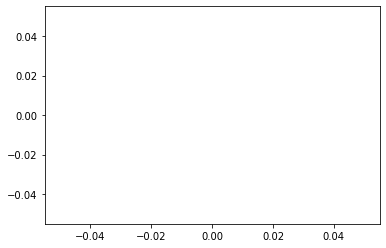

In [14]:
fig, ax = plt.subplots()  
x, ysin, ycos = [], [], []  
ln1, = plt.plot([], [], 'ro')  
ln2, = plt.plot([], [], 'm*')  

In [16]:
def init():  
    ax.set_xlim(0, 2*np.pi)  
    ax.set_ylim(-1, 1)  
  
def update(i):  
    x.append(i)  
    ysin.append(np.sin(i))  
    ycos.append(np.cos(i))  
    ln1.set_data(x, ysin)  
    ln2.set_data(x, ycos)

In [17]:
ani = FuncAnimation(fig, update, np.linspace(0, 2*np.pi, 64), init_func=init)  
plt.show()

In [18]:
writer = PillowWriter(fps=25)  
ani.save("demo_sine.gif", writer=writer)  

![](demo_sine.gif)

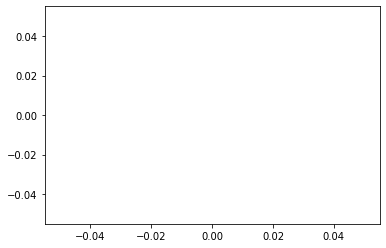

In [42]:
fig, ax = plt.subplots()  
x, ysin, = [], []
ln1, = plt.plot([], [], 'ro')  
ln1.set_data([1, 2], [1, 2])

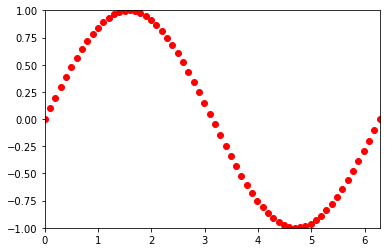

In [74]:
fig, ax = plt.subplots()  
x, ysin, = [], []
ln1, = plt.plot([], [], 'ro')  

def init():  
    ax.set_xlim(0, 2*np.pi)  
    ax.set_ylim(-1, 1)  
  
def update(i):  
    x.append(i)  
    ysin.append(np.sin(i))  
    ln1.set_data(x, ysin)
    
a = FuncAnimation(fig, update, np.linspace(0, 2*np.pi, 64), init_func=init)  
writer = PillowWriter(fps=10)  
a.save("sine.gif", writer=writer);

![](sine.gif) 

In [22]:
pwd

'/Users/raphael/GitHub/edunum/doc/plot/gif'

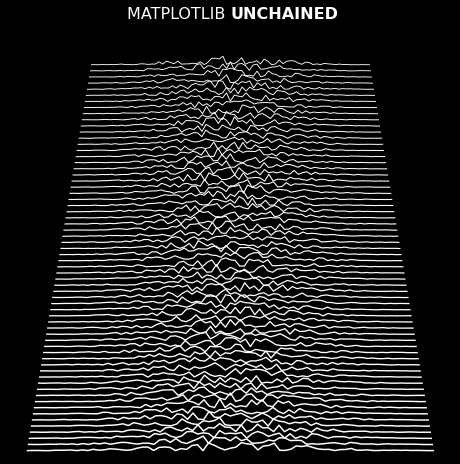

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Fixing random state for reproducibility
np.random.seed(19680801)


# Create new Figure with black background
fig = plt.figure(figsize=(8, 8), facecolor='black')

# Add a subplot with no frame
ax = plt.subplot(111, frameon=False)

# Generate random data
data = np.random.uniform(0, 1, (64, 75))
X = np.linspace(-1, 1, data.shape[-1])
G = 1.5 * np.exp(-4 * X ** 2)

# Generate line plots
lines = []
for i in range(len(data)):
    # Small reduction of the X extents to get a cheap perspective effect
    xscale = 1 - i / 200.
    # Same for linewidth (thicker strokes on bottom)
    lw = 1.5 - i / 100.0
    line, = ax.plot(xscale * X, i + G * data[i], color="w", lw=lw)
    lines.append(line)

# Set y limit (or first line is cropped because of thickness)
ax.set_ylim(-1, 70)

# No ticks
ax.set_xticks([])
ax.set_yticks([])

# 2 part titles to get different font weights
ax.text(0.5, 1.0, "MATPLOTLIB ", transform=ax.transAxes,
        ha="right", va="bottom", color="w",
        family="sans-serif", fontweight="light", fontsize=16)
ax.text(0.5, 1.0, "UNCHAINED", transform=ax.transAxes,
        ha="left", va="bottom", color="w",
        family="sans-serif", fontweight="bold", fontsize=16)


def update(*args):
    # Shift all data to the right
    data[:, 1:] = data[:, :-1]

    # Fill-in new values
    data[:, 0] = np.random.uniform(0, 1, len(data))

    # Update data
    for i in range(len(data)):
        lines[i].set_ydata(i + G * data[i])

    # Return modified artists
    return lines

# Construct the animation, using the update function as the animation director.
anim = animation.FuncAnimation(fig, update, interval=10)
anim.save("demo.gif", writer=writer)

![](demo.gif)

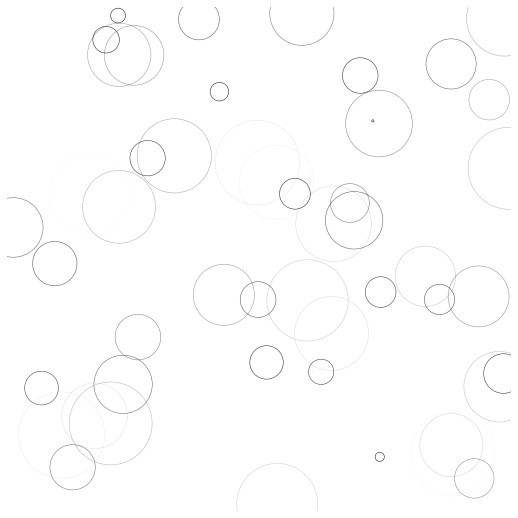

In [35]:
# Fixing random state for reproducibility
np.random.seed(19680801)


# Create new Figure and an Axes which fills it.
fig = plt.figure(figsize=(7, 7))
ax = fig.add_axes([0, 0, 1, 1], frameon=False)
ax.set_xlim(0, 1), ax.set_xticks([])
ax.set_ylim(0, 1), ax.set_yticks([])

# Create rain data
n_drops = 50
rain_drops = np.zeros(n_drops, dtype=[('position', float, 2),
                                      ('size',     float, 1),
                                      ('growth',   float, 1),
                                      ('color',    float, 4)])

# Initialize the raindrops in random positions and with
# random growth rates.
rain_drops['position'] = np.random.uniform(0, 1, (n_drops, 2))
rain_drops['growth'] = np.random.uniform(50, 200, n_drops)

# Construct the scatter which we will update during animation
# as the raindrops develop.
scat = ax.scatter(rain_drops['position'][:, 0], rain_drops['position'][:, 1],
                  s=rain_drops['size'], lw=0.5, edgecolors=rain_drops['color'],
                  facecolors='none')


def update(frame_number):
    # Get an index which we can use to re-spawn the oldest raindrop.
    current_index = frame_number % n_drops

    # Make all colors more transparent as time progresses.
    rain_drops['color'][:, 3] -= 1.0/len(rain_drops)
    rain_drops['color'][:, 3] = np.clip(rain_drops['color'][:, 3], 0, 1)

    # Make all circles bigger.
    rain_drops['size'] += rain_drops['growth']

    # Pick a new position for oldest rain drop, resetting its size,
    # color and growth factor.
    rain_drops['position'][current_index] = np.random.uniform(0, 1, 2)
    rain_drops['size'][current_index] = 5
    rain_drops['color'][current_index] = (0, 0, 0, 1)
    rain_drops['growth'][current_index] = np.random.uniform(50, 200)

    # Update the scatter collection, with the new colors, sizes and positions.
    scat.set_edgecolors(rain_drops['color'])
    scat.set_sizes(rain_drops['size'])
    scat.set_offsets(rain_drops['position'])


# Construct the animation, using the update function as the animation director.
animation = FuncAnimation(fig, update, interval=10)
animation.save("rain.gif", writer=writer)

![](rain.gif)

## JavaScript interactif

http://louistiao.me/posts/notebooks/embedding-matplotlib-animations-in-jupyter-as-interactive-javascript-widgets/

In [63]:
%matplotlib inline

In [64]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

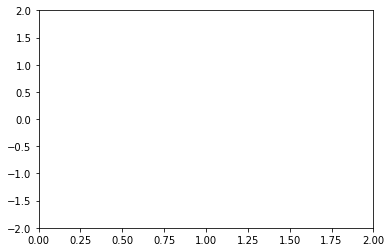

In [65]:
fig, ax = plt.subplots()

ax.set_xlim(( 0, 2))
ax.set_ylim((-2, 2))

line, = ax.plot([], [], lw=2)

In [66]:
def init():
    line.set_data([], [])
    return (line,)

In [82]:
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    plt.text(-0.2, 0.2, i)
    return (line,)

In [83]:
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, 
                               blit=True)

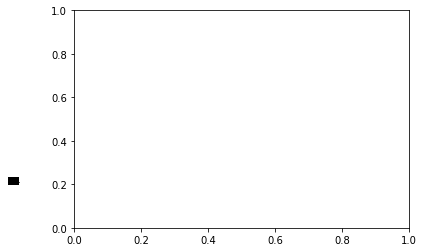

In [84]:
HTML(anim.to_jshtml())

In [74]:
rc('animation', html='jshtml')

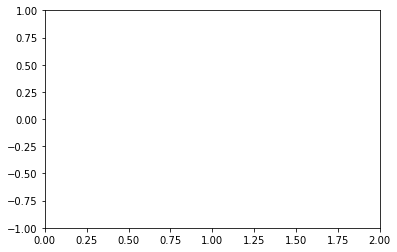

In [118]:
fig, ax = plt.subplots()
ax.set_xlim(( 0, 2))
ax.set_ylim((-1, 1))
#plt.text(0.5, 0.5, f'text={123}')

line, = ax.plot([], [], lw=2)

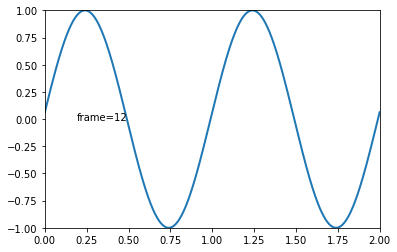

In [122]:
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    label = fig.text(0.2, 0.5, f'frame={i}')
    return (line, label)

fig

In [123]:
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, 
                               blit=True)

In [124]:
anim

## Animer du texte

0
1
2
3
4
5
6
7
8
9


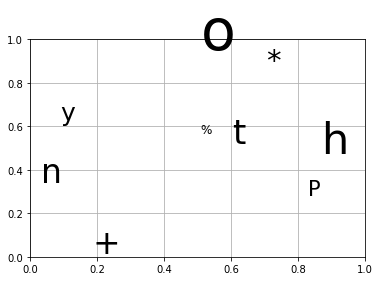

In [4]:
s = 'Python %*+'
fig, ax = plt.subplots()
plt.grid()

def init():
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    pass
    

def update(frame):
    print(frame)    
    c = s[frame]
    size = np.random.randint(10, 60)
    pos = np.random.rand(2)
    plt.text(*pos, c, fontsize=size)

ani = FuncAnimation(fig, update, frames=range(len(s)), init_func=init, blit=False, interval=500)

HTML(ani.to_jshtml())

In [ ]:
s = 'Python %*+'
fig, ax = plt.subplots()
plt.grid()

def init():
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    pass 

def update(frame):
    print(frame)    
    c = s[frame]
    size = np.random.randint(10, 60)
    pos = np.random.rand(2)
    plt.text(*pos, c, fontsize=size)

ani = FuncAnimation(fig, update, frames=range(len(s)), init_func=init, blit=False, interval=500)

HTML(ani.to_jshtml())

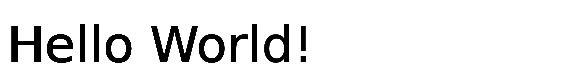

In [46]:
s = 'Hello World! '
fig, ax = plt.subplots(figsize=(10, 1), dpi=72)
plt.axis('off')
plt.text(0, 0, '')
    
def init():
    plt.text(0, 0, '')

def update(i):
    plt.text(0, 0, s[:(i)], fontsize=50)
    
ani = FuncAnimation(fig, update, frames=range(len(s)), init_func=init, blit=False, interval=200)
ani.save('python.gif')

HTML(ani.to_jshtml()) 

![](python.gif)

In [41]:
ll


total 52688
-rw-r--r--  1 raphael  staff  2600835  5 mar 15:28 animate_decay.ipynb
-rw-r--r--  1 raphael  staff  8046205  9 fév 21:21 demo.gif
-rw-r--r--  1 raphael  staff      545 10 fév 07:10 demo.py
-rw-r--r--  1 raphael  staff   216100  9 fév 21:29 demo2.gif
-rw-r--r--  1 raphael  staff      503 10 fév 07:23 demo2.py
-rw-r--r--  1 raphael  staff   353890  9 fév 21:11 demo_sine.gif
-rw-r--r--  1 raphael  staff  1745202  9 fév 21:51 dynamic_images.gif
-rw-r--r--  1 raphael  staff  6162144  7 mar 22:13 gif.ipynb
-rw-r--r--  1 raphael  staff    88797  9 fév 21:53 line.gif
-rw-r--r--  1 raphael  staff     9867  7 mar 22:13 python.gif
-rw-r--r--  1 raphael  staff  4456191  9 fév 21:39 rain.gif
-rw-r--r--  1 raphael  staff  1745202 10 fév 05:06 sin_cos.gif
-rw-r--r--  1 raphael  staff   216100 10 fév 08:27 sine.gif
-rw-r--r--  1 raphael  staff     7547 10 fév 08:08 sine.mov
-rw-r--r--  1 raphael  staff    15482 10 fév 08:26 sine.mp4
